In [16]:
import math
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']

# 一.读取数据

In [17]:
train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=" ")
test_data = pd.read_csv('data/used_car_testB_20200421.csv', sep=" ")
print("训练数据维度:|{}|".format(train_data.shape))
print("测试数据维度:|{}|".format(test_data.shape))
print("训练集columns:", train_data.columns)
print("测试集columns:", test_data.columns)
chn_columns = ['交易ID', '汽车名称', '注册日期', '车型编码', '汽车品牌', '车身类型', '燃油类型', '变速箱', '发动机功率', '汽车已行驶公里',
                  '汽车存在尚未修复的损坏', '地区编码', '销售方', '报价类型', '汽车上线时间', '价格','v_0', 'v_1', 'v_2', 'v_3',
               'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
               'v_13', 'v_14']
eng_columns = ['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
               'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
               'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
               'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
               'v_13', 'v_14']
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 200)
train_data.rename( columns = dict( zip( eng_columns,chn_columns )) ).head(5)

训练数据维度:|(150000, 31)|
测试数据维度:|(50000, 30)|
训练集columns: Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')
测试集columns: Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')


,交易ID,汽车名称,注册日期,车型编码,汽车品牌,车身类型,燃油类型,变速箱,发动机功率,汽车已行驶公里,汽车存在尚未修复的损坏,地区编码,销售方,报价类型,汽车上线时间,价格,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


# 二.数据探索

In [18]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


price max:|99999|, price min:|11|


C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


(200000, 31)
0    149999
1         1
Name: seller, dtype: int64
0    199999
1         1
Name: seller, dtype: int64
14        20070009
20        19970004
22        19970008
42        19960009
51        20020006
            ...   
199916    20150008
199925    20020003
199935    19960007
199938    20080004
199939    19950006
Name: regDate, Length: 15083, dtype: int64
year max:|2015|, year min:|1991|
month max:|00|, month min:|00|
day max:|12|, day min:|01|
Series([], Name: creatDate, dtype: int64)


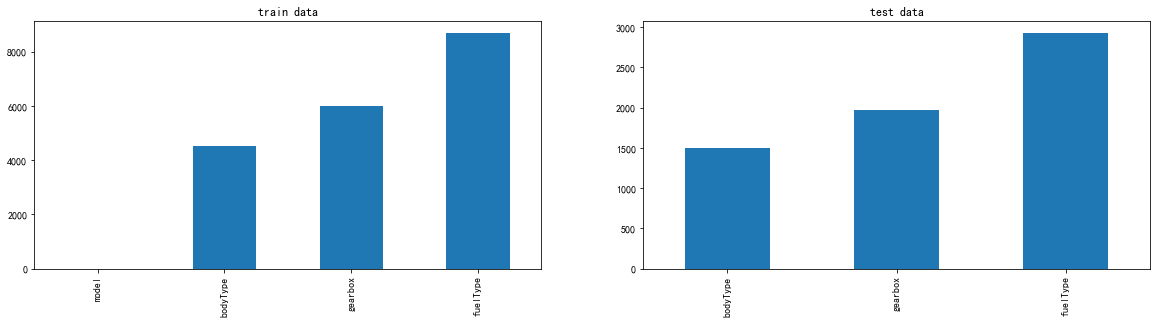

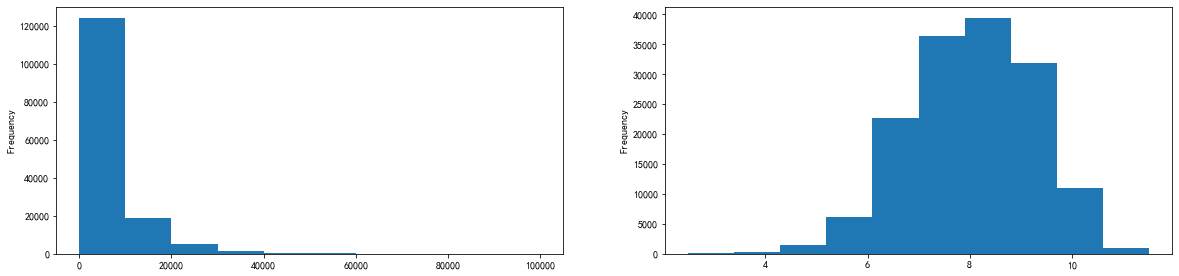

C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


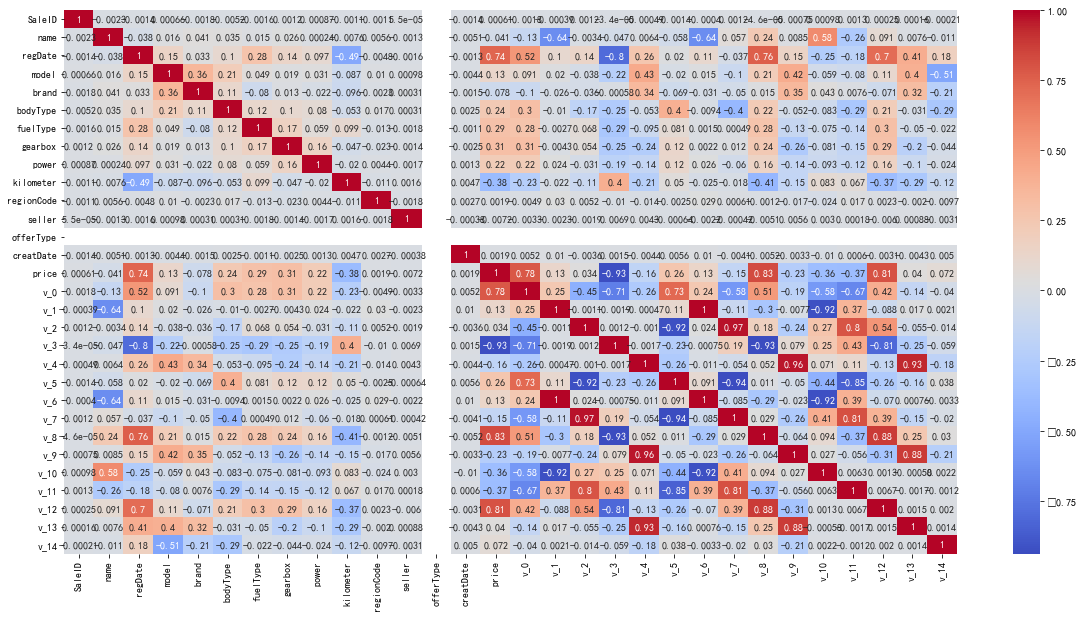

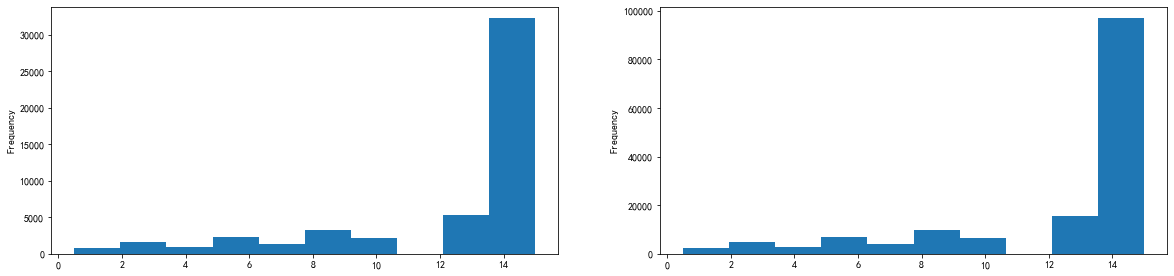

In [19]:
"""
-----------------------缺失值分析--------------------------
结论:
缺失值字段：model, bodyType, fuelType, gearbox 
类别型字段：notRepairedDamage
"""
# print(train_data.info())
# print("="*80)
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(221)
plt.title('train data')
null_cols = train_data.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols.sort_values().plot.bar()

fig.add_subplot(222)
plt.title('test data')
null_cols = test_data.isnull().sum()
null_cols = null_cols[null_cols > 0]
null_cols.sort_values().plot.bar()

"""
---------------------------价格分析---------------------
将价格长尾分布做 log(x+1) 映射
np.log1p() 反变换 np.expm1()
"""
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(221)
# plt.title('价格变换前')
train_data['price'].plot.hist()
print('price max:|{}|, price min:|{}|'.format(train_data.price.max(), train_data.price.min()))
fig.add_subplot(222)
train_data['price'] = train_data['price'].apply(lambda x: np.log1p(x))
# plt.title('价格变换后')
train_data['price'].plot.hist()

"""
-----------------------特征相似度分析-----------------------
结论：
一下几个特征高度相关，后面考虑删除v_1, v_2, v_4
v_1 == v_6
v_2 == v_7
v_4 == v_9, v_13
"""
plt.figure( figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

"""
------------------------训练集和测试集合并--------------------
"""

train_size = train_data.shape[0]
test_size = test_data.shape[0]
df = pd.concat([train_data, test_data], ignore_index=True)
print(df.shape)
df.head()

"""
-------------------查找连续型特征-------------------
结论：
['offerType', 1]：该字段只有一个取值，属与无用字段，应drop
可以考虑对一下特征做分桶
 ['name', 128660],
 ['regDate', 3898],
 ['model', 249],
 ['power', 458],
 ['regionCode', 8010],
 ['creatDate', 106],
"""
ccm_type = [[col, len(df[col].unique())] for col in df.columns]
ccm_type

"""
-------------------notRepairedDamage--------------------
结论：
将 '-' 做众数填充
"""
df['notRepairedDamage'].value_counts()

"""
-------------------power字段分析--------------------
结论：
训练集power异常值数量为121个
训练集+测试集power异常值数量为158个
"""
# print(train_data['power'][train_data['power'] > 600].value_counts())
df['power'][df['power'] > 600].value_counts()

"""
--------------------------seller----------------------
结论：
seller中只有一个sample取值为1，属于无用字段，丢弃
"""
print(train_data['seller'].value_counts())
print(df['seller'].value_counts())

"""
-----------------------------kilometer------------------------
结论：
训练集测试集数据分布较一至
"""
fig = plt.figure(figsize=(20,10))
fig.add_subplot(221)
# plt.title('测试集')
test_data['kilometer'].plot.hist()
fig.add_subplot(222)
# plt.title('训练集')
train_data['kilometer'].plot.hist()

"""
-----------------------------------regionCode------------------------
"""
df['regionCode'].value_counts()

"""
----------------------------------brand-------------------------------
"""
df['brand'].value_counts()

"""
-------------------------------'regDate', 'creatDate',--------------------------
regDate日期格式转换出现错误，
在错误的日期里只有月份的数据是错误的，出现月份为0
暂时不做处理，后面做特征工程的时候再处理
to_datetime三个解决日期匹配错误的参数
errors = raise: 遇到错误信息给出提示
         coerce: 遇到错误信息将其设置为nat
         ignore: 只保留能够转换的值
"""
regdate = pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')
null_regdate = df['regDate'][regdate.isnull()]
print(null_regdate)
# year, month, day  = null_regdate.apply(lambda x: str(x)[0:4], str(x)[4:6], str(x)[6:8])
year = null_regdate.apply(lambda x: str(x)[0:4])
month = null_regdate.apply(lambda x: str(x)[4:6])
day = null_regdate.apply(lambda x: str(x)[6:])
print("year max:|{}|, year min:|{}|".format(year.max(), year.min()))
print("month max:|{}|, month min:|{}|".format(month.max(), month.min()))
print("day max:|{}|, day min:|{}|".format(day.max(), day.min()))
creatdata = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')
print(df['creatDate'][creatdata.isnull()])




D:\Anaconda3\envs\dev3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\dev3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\dev3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\dev3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\dev3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\envs\dev3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have v

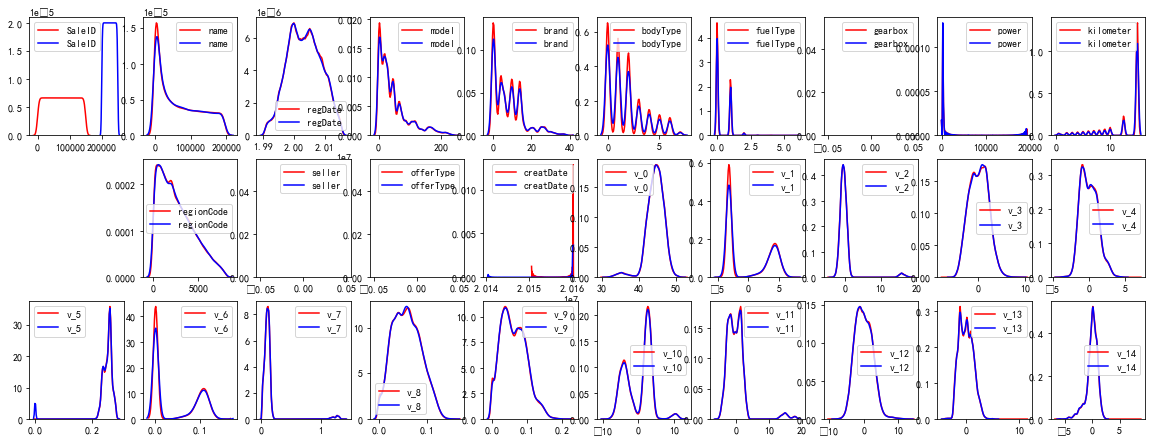

In [20]:
"""
-------------------------------对比训练集和测试集分布------------------------
结论：训练集和测试集分布很一致
"""
fig = plt.figure(figsize=(20,10))
for index, col in enumerate(test_data.columns):
    if col == 'notRepairedDamage':
        continue
    ax = plt.subplot(4, 10, index+1)
    ax = sns.kdeplot(train_data[col], color='r')
    ax = sns.kdeplot(test_data[col], color='b')

D:\Anaconda3\envs\dev3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\Users\许多多\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from curr

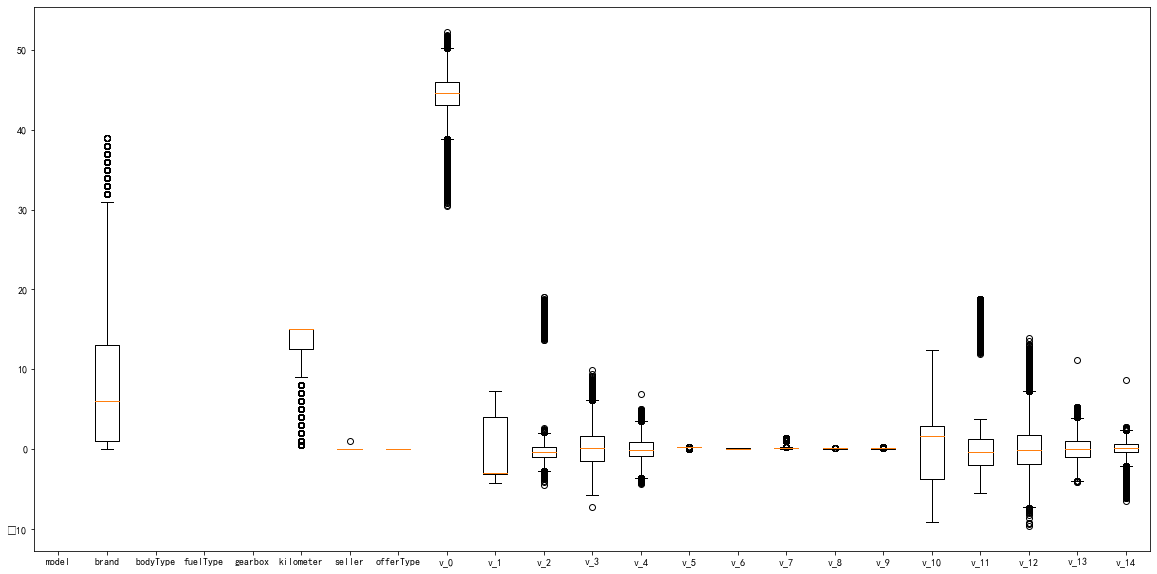

In [6]:
"""
------------------异常值分析-------------------------
在训练集中v_3, v_4, v_13, v_14字段存在非常明显的异常值，而在测试集中没有，在后面中将其删掉
"""
plt.figure(figsize=(20,10))
box_train_data = train_data.drop(['notRepairedDamage', 'regDate', 'creatDate', 'SaleID', 'name', 'power', 'regionCode', 'price'], axis=1)
plt.boxplot(x=box_train_data.values, labels=box_train_data.columns)
plt.show()

# 三.数据预处理

In [7]:
df.iloc[149999]

SaleID                  149999
name                    177672
regDate               19990204
model                       19
brand                       28
bodyType                     6
fuelType                     0
gearbox                      1
power                      193
kilometer                 12.5
notRepairedDamage          0.0
regionCode                 235
seller                       0
offerType                    0
creatDate             20160305
price                  8.45553
v_0                    45.5364
v_1                   -3.20033
v_2                   -1.61289
v_3                 -0.0671441
v_4                   -1.39617
v_5                   0.284475
v_6                          0
v_7                   0.040072
v_8                  0.0625427
v_9                  0.0258194
v_10                   1.97845
v_11                  -3.17991
v_12                 0.0317235
v_13                  -1.48335
v_14                 -0.342674
Name: 149999, dtype: object

In [8]:
"""
缺失值填充零
将notRepairedDamage字段的异常值填充众数
"""
df = df.fillna(0)
df[ 'notRepairedDamage' ].replace('-', '0.0', inplace=True)#.astype("float32")
df[ 'notRepairedDamage' ] = df[ 'notRepairedDamage' ].astype("float32")

"""
删除异常值
"""
df.drop([38424], inplace=True)
train_size -= 1

"""
丢弃无用字段
seller, offerType, Saleid
"""
# df.drop(['seller', 'offerType'], axis=1, inplace=True)

"""
处理power字段
"""
df['power'][df['power'] > 600] = 600
df['power'].max()

def abnormal_date_process(date):
    str_date = str(date)
    year = int(str_date[0:4])
    month = int(str_date[4:6])
    day = int(str_date[6:])
    if month<1:
        month = 1
    elif month>12:
        month = 12
    return datetime(year, month, day) 
df['creatDate'] = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')
df['regDate'] = df['regDate'].apply(abnormal_date_process)

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 四.特征工程

1     34443
2     28196
3     24197
5     19939
0     15534
4     14819
7     11708
8      6897
6      6117
9      5154
11     5092
12     4485
10     3426
13     3204
17     2808
16     2628
18     2310
14     2198
15     1518
19     1327
20     1175
22     1027
21      883
23      640
24      235
25       39
Name: model_bin, dtype: int64

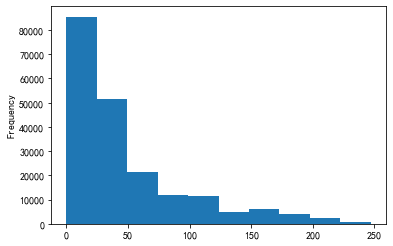

In [9]:
"""
-------------------------提取时间类型数据-------------------------------
"""
# df_newcols = pd.DataFrame()
df['use_day'] = (pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce') \
                         - pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')).dt.days
df['creatDate_year'] = df['creatDate'].dt.year
df['creatDate_month'] = df['creatDate'].dt.month
# df['creatDate_day'] = df['creatDate'].dt.day
df['regDate_year'] = df['regDate'].dt.year
df['regDate_month'] = df['regDate'].dt.month
# df['regDate_day'] = df['regDate'].dt.day
df['use_year'] = df['creatDate_year'] - df['regDate_year']
bin_ = [-math.inf, 3, 7, 10, math.inf]
df['use_year_bin'] = pd.cut(df['use_year'], bin_, labels=False)
df['use_year_bin'].value_counts()

# 发动机功率分桶
bin_ = [i * 10 for i in range(-1,61)]
df['power_bin'] = pd.cut(df['power'], bin_, labels=False)
df['power_bin'].value_counts()

# model分桶
df['model'].plot.hist()
# print("model max:|{}|, model min:|{}|".format(df['model'].max(), df['model'].min()))
bin_ = [i*10 for i in range(-1, 30)]
df['model_bin'] = pd.cut(df['model'], bin_, labels=False)
df['model_bin'].value_counts()

In [10]:
"""
将字段基于价格聚合
"""
groupby_train = df[:train_size]
def price_groupby(df, col):
    infos = {}
    for name, group in groupby_train.groupby(col):
        info = {}
        info[col + '_price_max'] = group['price'].max()
        info[col + '_price_min'] = group['price'].min()
        info[col + '_price_mean'] = group['price'].mean()
        info[col + '_price_sum'] = group['price'].sum()
        info[col + '_price_std'] = group['price'].std()
        info[col + '_price_sum'] = group['price'].median()
        infos[name] = info
    info_df = pd.DataFrame(infos).T.reset_index().rename(columns={"index":col})
    df = df.merge(info_df, how='left', on=col)
    return df
cols = ["brand", "bodyType", "fuelType", "gearbox", "kilometer", "notRepairedDamage", 'use_year',
         "regDate_year",  "model", "power", "creatDate_year", "creatDate_month", "regDate_month", #'regionCode', 'name'
       ]
#"power_bin", "creatDate_year", "creatDate_month", "regDate_month", 加入这几个特征的聚合之后loss收敛平滑了很多

for col in cols:
    df = price_groupby(df, col=col)
print(df.shape)
df.head()

"""
对聚合的缺失值做零填充
聚合后两个出现null值的特征字段，power, creatDate_year,
-------------------------power-------------------------
在power_bin==55这个桶里面,只有一个值，不能用来计算方差计算出来的值为零
in：print(df["power_bin"][df["power_bin_price_std"].isnull()])
    df['price'][df['power_bin']==55]
out: 149644    55
     159386    55
     169769    55
     180325    55
     Name: power_bin, dtype: int64
     149644    11.332614
     159386     0.000000
     169769     0.000000
     180325     0.000000
---------------------------creatDate_year----------------------------
creatDate_year里面出现price==0的样本是在测试集里面，所有可以不用管
in：print(df["creatDate_year"][df["creatDate_year_price_std"].isnull()])
    df['price'][df["creatDate_year"]==2014]
out:155610    2014
    Name: creatDate_year, dtype: int64
    155610    0.0
    Name: price, dtype: float64
"""


(199999, 105)


'\n对聚合的缺失值做零填充\n聚合后两个出现null值的特征字段，power, creatDate_year,\n-------------------------power-------------------------\n在power_bin==55这个桶里面,只有一个值，不能用来计算方差计算出来的值为零\nin：print(df["power_bin"][df["power_bin_price_std"].isnull()])\n    df[\'price\'][df[\'power_bin\']==55]\nout: 149644    55\n     159386    55\n     169769    55\n     180325    55\n     Name: power_bin, dtype: int64\n     149644    11.332614\n     159386     0.000000\n     169769     0.000000\n     180325     0.000000\n---------------------------creatDate_year----------------------------\ncreatDate_year里面出现price==0的样本是在测试集里面，所有可以不用管\nin：print(df["creatDate_year"][df["creatDate_year_price_std"].isnull()])\n    df[\'price\'][df["creatDate_year"]==2014]\nout:155610    2014\n    Name: creatDate_year, dtype: int64\n    155610    0.0\n    Name: price, dtype: float64\n'

In [11]:
pd.set_option('display.max_rows', 300)
df.isnull().sum()

SaleID                            0
name                              0
regDate                           0
model                             0
brand                             0
bodyType                          0
fuelType                          0
gearbox                           0
power                             0
kilometer                         0
notRepairedDamage                 0
regionCode                        0
seller                            0
offerType                         0
creatDate                         0
price                             0
v_0                               0
v_1                               0
v_2                               0
v_3                               0
v_4                               0
v_5                               0
v_6                               0
v_7                               0
v_8                               0
v_9                               0
v_10                              0
v_11                        

In [12]:
for col in df.columns:
    if df[col].isnull().sum():
        print(df[col][df[col].isnull()])
        print(df['price'][df[col].isnull()])
        df[col][df[col].isnull()] = 0

159263   NaN
Name: use_year_price_max, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_min, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_mean, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_sum, dtype: float64
159263    0.0
Name: price, dtype: float64
159263   NaN
Name: use_year_price_std, dtype: float64
159263    0.0
Name: price, dtype: float64
135010   NaN
Name: model_price_std, dtype: float64
135010    8.006701
Name: price, dtype: float64
153205   NaN
154190   NaN
157166   NaN
159385   NaN
162562   NaN
164906   NaN
169768   NaN
170631   NaN
171029   NaN
173031   NaN
174548   NaN
177505   NaN
180324   NaN
182454   NaN
189329   NaN
193527   NaN
197141   NaN
Name: power_price_max, dtype: float64
153205    0.0
154190    0.0
157166    0.0
159385    0.0
162562    0.0
164906    0.0
169768    0.0
170631    0.0
171029    0.0
173031    0.0
174548    0.0
177505  

D:\Anaconda3\envs\dev3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
"""
--------------------------------特征剔除----------------------------
丢弃特征：
'SaleID', 'name', 'regDate', 'model', 'seller', 'creatDate', 'offerType',
"""
result = pd.DataFrame()
result['SaleID'] = df[train_size:]['SaleID']
df.drop(['SaleID', 'name', 'regDate', 'model', 'seller', 'creatDate', 'offerType',], axis=1, inplace=True)
print("参与训练字段：|{}|".format(df.columns))

参与训练字段：|Index(['brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer',
       'notRepairedDamage', 'regionCode', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'use_day', 'creatDate_year', 'creatDate_month',
       'regDate_year', 'regDate_month', 'use_year', 'use_year_bin',
       'power_bin', 'model_bin', 'brand_price_max', 'brand_price_min',
       'brand_price_mean', 'brand_price_sum', 'brand_price_std',
       'bodyType_price_max', 'bodyType_price_min', 'bodyType_price_mean',
       'bodyType_price_sum', 'bodyType_price_std', 'fuelType_price_max',
       'fuelType_price_min', 'fuelType_price_mean', 'fuelType_price_sum',
       'fuelType_price_std', 'gearbox_price_max', 'gearbox_price_min',
       'gearbox_price_mean', 'gearbox_price_sum', 'gearbox_price_std',
       'kilometer_price_max', 'kilometer_price_min', 'kilometer_price_mean',
       'kilometer_price_sum', 'kilometer_price_std',

In [15]:
"""
lightgbm
"""
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error

train_x = df[:train_size].drop(['price'], axis=1).values
train_y = df['price'][:train_size].values
test_x = df[train_size:].drop('price', axis=1).values

#自定义损失函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_absolute_error(np.expm1(label), np.expm1(preds))
    return 'myFeval', score, False

param = {'boosting_type': 'gbdt',
         'num_leaves': 31,
         'max_depth': -1,
         "lambda_l2": 2,  # 防止过拟合
         'min_data_in_leaf': 20,  # 防止过拟合，好像都不用怎么调
         'objective': 'regression_l1',
         'learning_rate': 0.01,    # 0.05-0.2
         "min_child_samples": 20,

         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8,
         "bagging_seed": 11,
         "metric": 'mae',
         }
folds = KFold(n_splits=5, shuffle=True, random_state=2020)
train_result = np.zeros(len(train_x))
test_result = np.zeros(len(test_x))
# predictions_train_lgb = np.zeros(len(train_x))
for i_fold, (train_index, valid_index) in enumerate(folds.split(train_x, train_y)):
    print("fold %s"%(i_fold+1))
    train_data = lgb.Dataset(train_x[train_index], train_y[train_index])
    valid_data = lgb.Dataset(train_x[valid_index], train_y[valid_index])
    num_round = 100000000
    clf = lgb.train(param, 
                    train_data,
                    num_round, 
                    valid_sets=[train_data, valid_data], 
                    verbose_eval=300,
                    early_stopping_rounds=600, 
                    feval=myFeval)
    train_result[valid_index] = clf.predict(train_x[valid_index], num_iteration=clf.best_iteration)
    test_result += clf.predict(test_x, num_iteration=clf.best_iteration) / folds.n_splits
#     predictions_train_lgb += clf.predict(train_x, num_iteration=clf.best_iteration) / folds.n_splits
print("lightgbm score: {:<8.8f}".format(mean_absolute_error(np.expm1(train_result), np.expm1(train_y))))


fold 1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7414
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 90
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 8.086718
Training until validation scores don't improve for 600 rounds
[300]	training's l1: 0.20595	training's myFeval: 1217.79	valid_1's l1: 0.209114	valid_1's myFeval: 1218.42
[600]	training's l1: 0.150327	training's myFeval

[20700]	training's l1: 0.0967558	training's myFeval: 386.857	valid_1's l1: 0.111218	valid_1's myFeval: 473.924
[21000]	training's l1: 0.0966088	training's myFeval: 385.984	valid_1's l1: 0.111186	valid_1's myFeval: 473.67
[21300]	training's l1: 0.0964875	training's myFeval: 385.19	valid_1's l1: 0.11115	valid_1's myFeval: 473.395
[21600]	training's l1: 0.0963642	training's myFeval: 384.274	valid_1's l1: 0.111118	valid_1's myFeval: 473.09
[21900]	training's l1: 0.0962474	training's myFeval: 383.594	valid_1's l1: 0.111087	valid_1's myFeval: 472.874
[22200]	training's l1: 0.0961329	training's myFeval: 382.798	valid_1's l1: 0.111061	valid_1's myFeval: 472.668
[22500]	training's l1: 0.0960276	training's myFeval: 382.169	valid_1's l1: 0.111032	valid_1's myFeval: 472.488
[22800]	training's l1: 0.0959073	training's myFeval: 381.361	valid_1's l1: 0.111001	valid_1's myFeval: 472.263
[23100]	training's l1: 0.0957917	training's myFeval: 380.614	valid_1's l1: 0.110972	valid_1's myFeval: 472.063
[2340

[43200]	training's l1: 0.0899699	training's myFeval: 346.228	valid_1's l1: 0.10976	valid_1's myFeval: 464.536
[43500]	training's l1: 0.089901	training's myFeval: 345.872	valid_1's l1: 0.109748	valid_1's myFeval: 464.459
[43800]	training's l1: 0.0898441	training's myFeval: 345.533	valid_1's l1: 0.109736	valid_1's myFeval: 464.385
[44100]	training's l1: 0.0897697	training's myFeval: 345.156	valid_1's l1: 0.109726	valid_1's myFeval: 464.332
[44400]	training's l1: 0.0896924	training's myFeval: 344.788	valid_1's l1: 0.109717	valid_1's myFeval: 464.307
[44700]	training's l1: 0.0896293	training's myFeval: 344.434	valid_1's l1: 0.109703	valid_1's myFeval: 464.219
[45000]	training's l1: 0.0895708	training's myFeval: 344.136	valid_1's l1: 0.109692	valid_1's myFeval: 464.193
[45300]	training's l1: 0.0895224	training's myFeval: 343.885	valid_1's l1: 0.109688	valid_1's myFeval: 464.166
[45600]	training's l1: 0.0894647	training's myFeval: 343.627	valid_1's l1: 0.109682	valid_1's myFeval: 464.136
[45

[65700]	training's l1: 0.086006	training's myFeval: 325.615	valid_1's l1: 0.109149	valid_1's myFeval: 461.221
[66000]	training's l1: 0.0859666	training's myFeval: 325.444	valid_1's l1: 0.109141	valid_1's myFeval: 461.203
[66300]	training's l1: 0.0859271	training's myFeval: 325.22	valid_1's l1: 0.109134	valid_1's myFeval: 461.154
[66600]	training's l1: 0.0858771	training's myFeval: 324.967	valid_1's l1: 0.109131	valid_1's myFeval: 461.138
[66900]	training's l1: 0.0858328	training's myFeval: 324.71	valid_1's l1: 0.109127	valid_1's myFeval: 461.102
[67200]	training's l1: 0.0857865	training's myFeval: 324.458	valid_1's l1: 0.109119	valid_1's myFeval: 461.058
[67500]	training's l1: 0.0857494	training's myFeval: 324.284	valid_1's l1: 0.109114	valid_1's myFeval: 461.028
[67800]	training's l1: 0.0857142	training's myFeval: 324.121	valid_1's l1: 0.109111	valid_1's myFeval: 460.983
[68100]	training's l1: 0.0856764	training's myFeval: 323.953	valid_1's l1: 0.109109	valid_1's myFeval: 460.96
[6840

[88200]	training's l1: 0.0831413	training's myFeval: 311.602	valid_1's l1: 0.108823	valid_1's myFeval: 459.431
[88500]	training's l1: 0.0831065	training's myFeval: 311.429	valid_1's l1: 0.108817	valid_1's myFeval: 459.411
[88800]	training's l1: 0.0830747	training's myFeval: 311.274	valid_1's l1: 0.108815	valid_1's myFeval: 459.411
[89100]	training's l1: 0.0830377	training's myFeval: 311.106	valid_1's l1: 0.108813	valid_1's myFeval: 459.4
[89400]	training's l1: 0.0830055	training's myFeval: 310.947	valid_1's l1: 0.108809	valid_1's myFeval: 459.372
[89700]	training's l1: 0.0829696	training's myFeval: 310.776	valid_1's l1: 0.108807	valid_1's myFeval: 459.367
[90000]	training's l1: 0.0829362	training's myFeval: 310.623	valid_1's l1: 0.108802	valid_1's myFeval: 459.338
[90300]	training's l1: 0.0829105	training's myFeval: 310.48	valid_1's l1: 0.108801	valid_1's myFeval: 459.315
[90600]	training's l1: 0.0828746	training's myFeval: 310.323	valid_1's l1: 0.108798	valid_1's myFeval: 459.303
[909

[110400]	training's l1: 0.0808865	training's myFeval: 300.235	valid_1's l1: 0.108584	valid_1's myFeval: 458.073
[110700]	training's l1: 0.0808589	training's myFeval: 300.134	valid_1's l1: 0.108581	valid_1's myFeval: 458.07
[111000]	training's l1: 0.0808301	training's myFeval: 300.003	valid_1's l1: 0.108578	valid_1's myFeval: 458.052
[111300]	training's l1: 0.0808021	training's myFeval: 299.868	valid_1's l1: 0.108576	valid_1's myFeval: 458.044
[111600]	training's l1: 0.0807783	training's myFeval: 299.732	valid_1's l1: 0.108574	valid_1's myFeval: 458.04
[111900]	training's l1: 0.080753	training's myFeval: 299.607	valid_1's l1: 0.108573	valid_1's myFeval: 458.036
[112200]	training's l1: 0.080725	training's myFeval: 299.469	valid_1's l1: 0.108571	valid_1's myFeval: 458.022
[112500]	training's l1: 0.0806967	training's myFeval: 299.339	valid_1's l1: 0.10857	valid_1's myFeval: 458.014
[112800]	training's l1: 0.0806646	training's myFeval: 299.186	valid_1's l1: 0.10857	valid_1's myFeval: 458.02

[17400]	training's l1: 0.0984162	training's myFeval: 398.464	valid_1's l1: 0.112029	valid_1's myFeval: 476.89
[17700]	training's l1: 0.0982657	training's myFeval: 397.434	valid_1's l1: 0.111986	valid_1's myFeval: 476.599
[18000]	training's l1: 0.098101	training's myFeval: 396.426	valid_1's l1: 0.111935	valid_1's myFeval: 476.322
[18300]	training's l1: 0.0979541	training's myFeval: 395.442	valid_1's l1: 0.111885	valid_1's myFeval: 475.984
[18600]	training's l1: 0.0977864	training's myFeval: 394.444	valid_1's l1: 0.111837	valid_1's myFeval: 475.686
[18900]	training's l1: 0.0976462	training's myFeval: 393.475	valid_1's l1: 0.111799	valid_1's myFeval: 475.379
[19200]	training's l1: 0.0974801	training's myFeval: 392.334	valid_1's l1: 0.111752	valid_1's myFeval: 475.089
[19500]	training's l1: 0.0973141	training's myFeval: 391.385	valid_1's l1: 0.111699	valid_1's myFeval: 474.815
[19800]	training's l1: 0.0971711	training's myFeval: 390.502	valid_1's l1: 0.111657	valid_1's myFeval: 474.599
[20

[39900]	training's l1: 0.0906935	training's myFeval: 350.916	valid_1's l1: 0.110119	valid_1's myFeval: 464.644
[40200]	training's l1: 0.0906202	training's myFeval: 350.523	valid_1's l1: 0.110107	valid_1's myFeval: 464.59
[40500]	training's l1: 0.0905568	training's myFeval: 350.192	valid_1's l1: 0.110092	valid_1's myFeval: 464.534
[40800]	training's l1: 0.0904919	training's myFeval: 349.837	valid_1's l1: 0.110079	valid_1's myFeval: 464.464
[41100]	training's l1: 0.0904322	training's myFeval: 349.465	valid_1's l1: 0.110072	valid_1's myFeval: 464.426
[41400]	training's l1: 0.0903708	training's myFeval: 349.09	valid_1's l1: 0.110059	valid_1's myFeval: 464.372
[41700]	training's l1: 0.0903146	training's myFeval: 348.729	valid_1's l1: 0.110046	valid_1's myFeval: 464.286
[42000]	training's l1: 0.0902459	training's myFeval: 348.386	valid_1's l1: 0.110034	valid_1's myFeval: 464.215
[42300]	training's l1: 0.0901854	training's myFeval: 348.064	valid_1's l1: 0.110026	valid_1's myFeval: 464.151
[42

[62400]	training's l1: 0.086696	training's myFeval: 328.519	valid_1's l1: 0.109453	valid_1's myFeval: 461.07
[62700]	training's l1: 0.0866413	training's myFeval: 328.271	valid_1's l1: 0.109445	valid_1's myFeval: 461.028
[63000]	training's l1: 0.0865969	training's myFeval: 328.023	valid_1's l1: 0.109436	valid_1's myFeval: 460.978
[63300]	training's l1: 0.0865493	training's myFeval: 327.774	valid_1's l1: 0.10943	valid_1's myFeval: 460.935
[63600]	training's l1: 0.0865021	training's myFeval: 327.566	valid_1's l1: 0.109423	valid_1's myFeval: 460.909
[63900]	training's l1: 0.0864382	training's myFeval: 327.321	valid_1's l1: 0.109408	valid_1's myFeval: 460.869
[64200]	training's l1: 0.0863745	training's myFeval: 327.025	valid_1's l1: 0.109397	valid_1's myFeval: 460.832
[64500]	training's l1: 0.0863274	training's myFeval: 326.818	valid_1's l1: 0.10939	valid_1's myFeval: 460.81
[64800]	training's l1: 0.0862886	training's myFeval: 326.603	valid_1's l1: 0.109384	valid_1's myFeval: 460.776
[65100

[84900]	training's l1: 0.0836865	training's myFeval: 314.003	valid_1's l1: 0.109011	valid_1's myFeval: 459.036
[85200]	training's l1: 0.0836437	training's myFeval: 313.813	valid_1's l1: 0.109006	valid_1's myFeval: 459.008
[85500]	training's l1: 0.0835952	training's myFeval: 313.601	valid_1's l1: 0.109001	valid_1's myFeval: 458.978
[85800]	training's l1: 0.0835711	training's myFeval: 313.47	valid_1's l1: 0.108999	valid_1's myFeval: 458.963
[86100]	training's l1: 0.0835424	training's myFeval: 313.32	valid_1's l1: 0.108997	valid_1's myFeval: 458.941
[86400]	training's l1: 0.0835183	training's myFeval: 313.184	valid_1's l1: 0.108993	valid_1's myFeval: 458.931
[86700]	training's l1: 0.0834875	training's myFeval: 313.033	valid_1's l1: 0.10899	valid_1's myFeval: 458.911
[87000]	training's l1: 0.0834561	training's myFeval: 312.875	valid_1's l1: 0.10899	valid_1's myFeval: 458.893
[87300]	training's l1: 0.0834207	training's myFeval: 312.698	valid_1's l1: 0.108985	valid_1's myFeval: 458.88
[87600

[107100]	training's l1: 0.081399	training's myFeval: 303.365	valid_1's l1: 0.10877	valid_1's myFeval: 457.859
[107400]	training's l1: 0.0813685	training's myFeval: 303.243	valid_1's l1: 0.108768	valid_1's myFeval: 457.86
[107700]	training's l1: 0.0813364	training's myFeval: 303.11	valid_1's l1: 0.108765	valid_1's myFeval: 457.838
[108000]	training's l1: 0.0813133	training's myFeval: 303.023	valid_1's l1: 0.108763	valid_1's myFeval: 457.834
[108300]	training's l1: 0.0812866	training's myFeval: 302.892	valid_1's l1: 0.10876	valid_1's myFeval: 457.824
[108600]	training's l1: 0.0812602	training's myFeval: 302.747	valid_1's l1: 0.108757	valid_1's myFeval: 457.807
[108900]	training's l1: 0.0812363	training's myFeval: 302.614	valid_1's l1: 0.108755	valid_1's myFeval: 457.803
[109200]	training's l1: 0.0812073	training's myFeval: 302.498	valid_1's l1: 0.108753	valid_1's myFeval: 457.791
[109500]	training's l1: 0.0811777	training's myFeval: 302.354	valid_1's l1: 0.108751	valid_1's myFeval: 457.7

[10800]	training's l1: 0.103912	training's myFeval: 428.27	valid_1's l1: 0.110669	valid_1's myFeval: 491.779
[11100]	training's l1: 0.103625	training's myFeval: 426.541	valid_1's l1: 0.110554	valid_1's myFeval: 490.946
[11400]	training's l1: 0.103359	training's myFeval: 424.806	valid_1's l1: 0.11044	valid_1's myFeval: 490.143
[11700]	training's l1: 0.103109	training's myFeval: 423.242	valid_1's l1: 0.11035	valid_1's myFeval: 489.491
[12000]	training's l1: 0.102858	training's myFeval: 421.618	valid_1's l1: 0.110239	valid_1's myFeval: 488.807
[12300]	training's l1: 0.102621	training's myFeval: 420.064	valid_1's l1: 0.110138	valid_1's myFeval: 488.11
[12600]	training's l1: 0.102378	training's myFeval: 418.542	valid_1's l1: 0.110049	valid_1's myFeval: 487.486
[12900]	training's l1: 0.102159	training's myFeval: 417.172	valid_1's l1: 0.109958	valid_1's myFeval: 486.902
[13200]	training's l1: 0.101949	training's myFeval: 415.804	valid_1's l1: 0.109877	valid_1's myFeval: 486.315
[13500]	traini

[33300]	training's l1: 0.0929765	training's myFeval: 361.721	valid_1's l1: 0.107297	valid_1's myFeval: 469.452
[33600]	training's l1: 0.092903	training's myFeval: 361.191	valid_1's l1: 0.10728	valid_1's myFeval: 469.312
[33900]	training's l1: 0.0928315	training's myFeval: 360.68	valid_1's l1: 0.107262	valid_1's myFeval: 469.165
[34200]	training's l1: 0.0927525	training's myFeval: 360.219	valid_1's l1: 0.107248	valid_1's myFeval: 469.071
[34500]	training's l1: 0.092667	training's myFeval: 359.654	valid_1's l1: 0.107228	valid_1's myFeval: 468.938
[34800]	training's l1: 0.0925846	training's myFeval: 359.213	valid_1's l1: 0.107212	valid_1's myFeval: 468.845
[35100]	training's l1: 0.0925045	training's myFeval: 358.792	valid_1's l1: 0.107199	valid_1's myFeval: 468.794
[35400]	training's l1: 0.09242	training's myFeval: 358.282	valid_1's l1: 0.107178	valid_1's myFeval: 468.671
[35700]	training's l1: 0.0923126	training's myFeval: 357.795	valid_1's l1: 0.107162	valid_1's myFeval: 468.56
[36000]	

[55800]	training's l1: 0.0881211	training's myFeval: 335.626	valid_1's l1: 0.106483	valid_1's myFeval: 464.404
[56100]	training's l1: 0.0880883	training's myFeval: 335.405	valid_1's l1: 0.106474	valid_1's myFeval: 464.347
[56400]	training's l1: 0.0880476	training's myFeval: 335.137	valid_1's l1: 0.106472	valid_1's myFeval: 464.336
[56700]	training's l1: 0.0880069	training's myFeval: 334.861	valid_1's l1: 0.106469	valid_1's myFeval: 464.306
[57000]	training's l1: 0.0879665	training's myFeval: 334.628	valid_1's l1: 0.106466	valid_1's myFeval: 464.273
[57300]	training's l1: 0.0879116	training's myFeval: 334.304	valid_1's l1: 0.106458	valid_1's myFeval: 464.241
[57600]	training's l1: 0.0878445	training's myFeval: 333.965	valid_1's l1: 0.106452	valid_1's myFeval: 464.211
[57900]	training's l1: 0.0877993	training's myFeval: 333.708	valid_1's l1: 0.106446	valid_1's myFeval: 464.176
[58200]	training's l1: 0.0877512	training's myFeval: 333.457	valid_1's l1: 0.106438	valid_1's myFeval: 464.136
[

[78300]	training's l1: 0.0848422	training's myFeval: 319.213	valid_1's l1: 0.1061	valid_1's myFeval: 462.089
[78600]	training's l1: 0.0848231	training's myFeval: 319.014	valid_1's l1: 0.106098	valid_1's myFeval: 462.087
[78900]	training's l1: 0.0847884	training's myFeval: 318.803	valid_1's l1: 0.106095	valid_1's myFeval: 462.064
[79200]	training's l1: 0.0847553	training's myFeval: 318.626	valid_1's l1: 0.10609	valid_1's myFeval: 462.03
[79500]	training's l1: 0.0847242	training's myFeval: 318.476	valid_1's l1: 0.106085	valid_1's myFeval: 462.005
[79800]	training's l1: 0.0846954	training's myFeval: 318.321	valid_1's l1: 0.106083	valid_1's myFeval: 461.999
[80100]	training's l1: 0.0846694	training's myFeval: 318.18	valid_1's l1: 0.106082	valid_1's myFeval: 462.002
[80400]	training's l1: 0.0846257	training's myFeval: 317.969	valid_1's l1: 0.106082	valid_1's myFeval: 462
Early stopping, best iteration is:
[79878]	training's l1: 0.0846902	training's myFeval: 318.288	valid_1's l1: 0.106082	va

[18000]	training's l1: 0.09811	training's myFeval: 395.327	valid_1's l1: 0.111567	valid_1's myFeval: 481.148
[18300]	training's l1: 0.0979557	training's myFeval: 394.427	valid_1's l1: 0.111517	valid_1's myFeval: 480.833
[18600]	training's l1: 0.0978079	training's myFeval: 393.497	valid_1's l1: 0.111471	valid_1's myFeval: 480.534
[18900]	training's l1: 0.0976618	training's myFeval: 392.55	valid_1's l1: 0.11142	valid_1's myFeval: 480.204
[19200]	training's l1: 0.0975306	training's myFeval: 391.683	valid_1's l1: 0.111378	valid_1's myFeval: 479.931
[19500]	training's l1: 0.0973762	training's myFeval: 390.758	valid_1's l1: 0.111333	valid_1's myFeval: 479.652
[19800]	training's l1: 0.0972263	training's myFeval: 389.696	valid_1's l1: 0.111287	valid_1's myFeval: 479.326
[20100]	training's l1: 0.0970831	training's myFeval: 388.8	valid_1's l1: 0.111242	valid_1's myFeval: 479.069
[20400]	training's l1: 0.0969497	training's myFeval: 387.95	valid_1's l1: 0.111198	valid_1's myFeval: 478.766
[20700]	

[40500]	training's l1: 0.0907301	training's myFeval: 349.376	valid_1's l1: 0.109763	valid_1's myFeval: 469.44
[40800]	training's l1: 0.0906574	training's myFeval: 349.019	valid_1's l1: 0.109753	valid_1's myFeval: 469.397
[41100]	training's l1: 0.0906057	training's myFeval: 348.681	valid_1's l1: 0.109742	valid_1's myFeval: 469.354
[41400]	training's l1: 0.090544	training's myFeval: 348.379	valid_1's l1: 0.10973	valid_1's myFeval: 469.293
[41700]	training's l1: 0.0904904	training's myFeval: 348.042	valid_1's l1: 0.109722	valid_1's myFeval: 469.245
[42000]	training's l1: 0.0904303	training's myFeval: 347.707	valid_1's l1: 0.109711	valid_1's myFeval: 469.228
[42300]	training's l1: 0.0903816	training's myFeval: 347.401	valid_1's l1: 0.1097	valid_1's myFeval: 469.157
[42600]	training's l1: 0.0903387	training's myFeval: 347.068	valid_1's l1: 0.109688	valid_1's myFeval: 469.071
[42900]	training's l1: 0.0903008	training's myFeval: 346.758	valid_1's l1: 0.109681	valid_1's myFeval: 468.988
[43200

[63000]	training's l1: 0.0868788	training's myFeval: 328.514	valid_1's l1: 0.109136	valid_1's myFeval: 466.004
[63300]	training's l1: 0.0868227	training's myFeval: 328.295	valid_1's l1: 0.109126	valid_1's myFeval: 465.96
[63600]	training's l1: 0.0867807	training's myFeval: 328.076	valid_1's l1: 0.109118	valid_1's myFeval: 465.914
[63900]	training's l1: 0.0867383	training's myFeval: 327.79	valid_1's l1: 0.109112	valid_1's myFeval: 465.887
[64200]	training's l1: 0.0866996	training's myFeval: 327.565	valid_1's l1: 0.109106	valid_1's myFeval: 465.851
[64500]	training's l1: 0.0866572	training's myFeval: 327.322	valid_1's l1: 0.109096	valid_1's myFeval: 465.802
[64800]	training's l1: 0.0866159	training's myFeval: 327.11	valid_1's l1: 0.10909	valid_1's myFeval: 465.772
[65100]	training's l1: 0.0865702	training's myFeval: 326.926	valid_1's l1: 0.109081	valid_1's myFeval: 465.728
[65400]	training's l1: 0.0865168	training's myFeval: 326.716	valid_1's l1: 0.109072	valid_1's myFeval: 465.694
[6570

[15000]	training's l1: 0.100609	training's myFeval: 408.369	valid_1's l1: 0.109732	valid_1's myFeval: 472.538
[15300]	training's l1: 0.100433	training's myFeval: 407.215	valid_1's l1: 0.109669	valid_1's myFeval: 472.172
[15600]	training's l1: 0.100256	training's myFeval: 406.087	valid_1's l1: 0.109608	valid_1's myFeval: 471.802
[15900]	training's l1: 0.100058	training's myFeval: 404.803	valid_1's l1: 0.109538	valid_1's myFeval: 471.387
[16200]	training's l1: 0.0998974	training's myFeval: 403.691	valid_1's l1: 0.109487	valid_1's myFeval: 471.05
[16500]	training's l1: 0.099734	training's myFeval: 402.63	valid_1's l1: 0.109433	valid_1's myFeval: 470.748
[16800]	training's l1: 0.0995775	training's myFeval: 401.535	valid_1's l1: 0.10937	valid_1's myFeval: 470.354
[17100]	training's l1: 0.0994217	training's myFeval: 400.493	valid_1's l1: 0.109314	valid_1's myFeval: 470.081
[17400]	training's l1: 0.0992812	training's myFeval: 399.553	valid_1's l1: 0.109276	valid_1's myFeval: 469.858
[17700]	t

[37500]	training's l1: 0.0922254	training's myFeval: 356.505	valid_1's l1: 0.107536	valid_1's myFeval: 459.43
[37800]	training's l1: 0.0921685	training's myFeval: 356.133	valid_1's l1: 0.107519	valid_1's myFeval: 459.337
[38100]	training's l1: 0.0920939	training's myFeval: 355.669	valid_1's l1: 0.107503	valid_1's myFeval: 459.25
[38400]	training's l1: 0.0920257	training's myFeval: 355.253	valid_1's l1: 0.10749	valid_1's myFeval: 459.186
[38700]	training's l1: 0.0919552	training's myFeval: 354.865	valid_1's l1: 0.107479	valid_1's myFeval: 459.133
[39000]	training's l1: 0.0918795	training's myFeval: 354.508	valid_1's l1: 0.107466	valid_1's myFeval: 459.046
[39300]	training's l1: 0.0918048	training's myFeval: 354.122	valid_1's l1: 0.107451	valid_1's myFeval: 458.964
[39600]	training's l1: 0.0917215	training's myFeval: 353.687	valid_1's l1: 0.107438	valid_1's myFeval: 458.897
[39900]	training's l1: 0.0916521	training's myFeval: 353.305	valid_1's l1: 0.107423	valid_1's myFeval: 458.798
[402

[60000]	training's l1: 0.0876845	training's myFeval: 332.753	valid_1's l1: 0.10681	valid_1's myFeval: 455.436
[60300]	training's l1: 0.0876424	training's myFeval: 332.559	valid_1's l1: 0.106806	valid_1's myFeval: 455.413
[60600]	training's l1: 0.087603	training's myFeval: 332.332	valid_1's l1: 0.106801	valid_1's myFeval: 455.359
[60900]	training's l1: 0.0875525	training's myFeval: 332.107	valid_1's l1: 0.106793	valid_1's myFeval: 455.314
[61200]	training's l1: 0.0875052	training's myFeval: 331.862	valid_1's l1: 0.106782	valid_1's myFeval: 455.265
[61500]	training's l1: 0.0874568	training's myFeval: 331.614	valid_1's l1: 0.106772	valid_1's myFeval: 455.229
[61800]	training's l1: 0.0874095	training's myFeval: 331.387	valid_1's l1: 0.106763	valid_1's myFeval: 455.197
[62100]	training's l1: 0.0873615	training's myFeval: 331.149	valid_1's l1: 0.106759	valid_1's myFeval: 455.156
[62400]	training's l1: 0.087321	training's myFeval: 330.911	valid_1's l1: 0.106754	valid_1's myFeval: 455.132
[627

[82500]	training's l1: 0.0845629	training's myFeval: 316.938	valid_1's l1: 0.106421	valid_1's myFeval: 453.417
[82800]	training's l1: 0.0845253	training's myFeval: 316.771	valid_1's l1: 0.106415	valid_1's myFeval: 453.385
[83100]	training's l1: 0.0844873	training's myFeval: 316.617	valid_1's l1: 0.106411	valid_1's myFeval: 453.364
[83400]	training's l1: 0.0844454	training's myFeval: 316.436	valid_1's l1: 0.106405	valid_1's myFeval: 453.334
[83700]	training's l1: 0.0844084	training's myFeval: 316.219	valid_1's l1: 0.1064	valid_1's myFeval: 453.299
[84000]	training's l1: 0.0843767	training's myFeval: 315.997	valid_1's l1: 0.106396	valid_1's myFeval: 453.273
[84300]	training's l1: 0.0843398	training's myFeval: 315.797	valid_1's l1: 0.106391	valid_1's myFeval: 453.255
[84600]	training's l1: 0.084303	training's myFeval: 315.659	valid_1's l1: 0.106383	valid_1's myFeval: 453.237
[84900]	training's l1: 0.0842836	training's myFeval: 315.527	valid_1's l1: 0.106382	valid_1's myFeval: 453.23
[8520

In [22]:
result['price'] = np.expm1(test_result)
result.to_csv('data/lgb_result.csv', index=False)